We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import warnings

# Setup
warnings.filterwarnings("ignore")

In [14]:
airline_passenger = pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/Module 2/Week 6/Day 27/airlines_passengers.csv') 

Let’s display the first five rows of data

In [15]:
airline_passenger.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [16]:
airline_passenger.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [17]:
airline_passenger["Month"]=pd.to_datetime(airline_passenger['Month'])
airline_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


The next thing we can do is convert the month column to an index. 


In [18]:
airline_passenger = airline_passenger.set_index('Month')

Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

Text(0, 0.5, 'Number of Passengers')

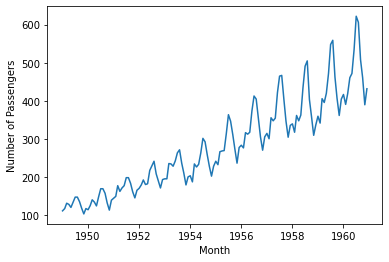

In [23]:
sns.lineplot(data=airline_passenger, x=airline_passenger.index, y="Passengers")
plt.ylabel('Number of Passengers')

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [24]:
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [26]:
# ADF Test
result = adfuller(airline_passenger.Passengers.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    

ADF Statistic: 0.8153688792060544
p-value: 0.9918802434376411
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


Store our results in a dataframe display it

In [28]:
df=adfuller(airline_passenger,autolag='AIC')
results=pd.Series(df[0:4], index=['ADF Statistic','p-value','Lags','Observations'])

for key,value in df[4].items():
        results['Critical Value (%s)'%key] = value
results


ADF Statistic             0.815369
p-value                   0.991880
Lags                     13.000000
Observations            130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64

Explain the results

In [ ]:
# p-value is above 5%, the absolute value of the test statistics is greater than the critical value, 
# we accept H0 and conclude that the time series is stationary

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

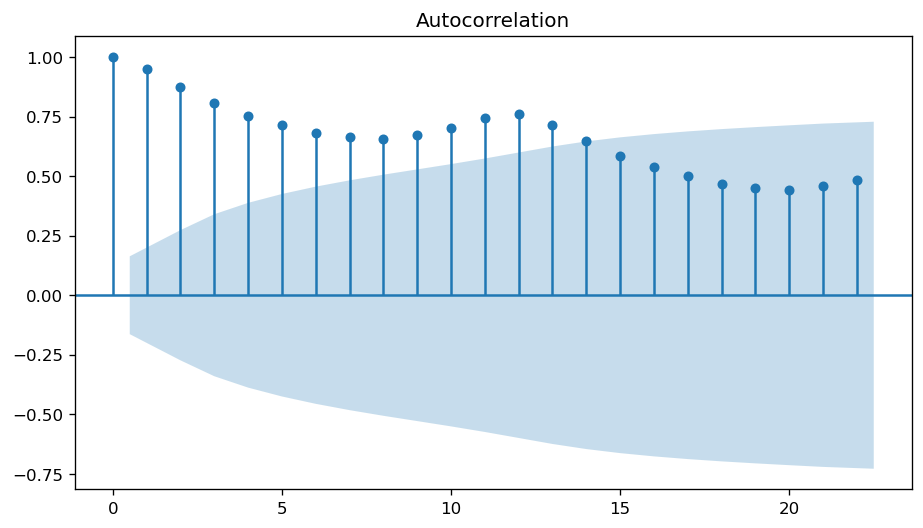

In [31]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(airline_passenger['Passengers'])
plt.show()


Calculate partial autocorrelation

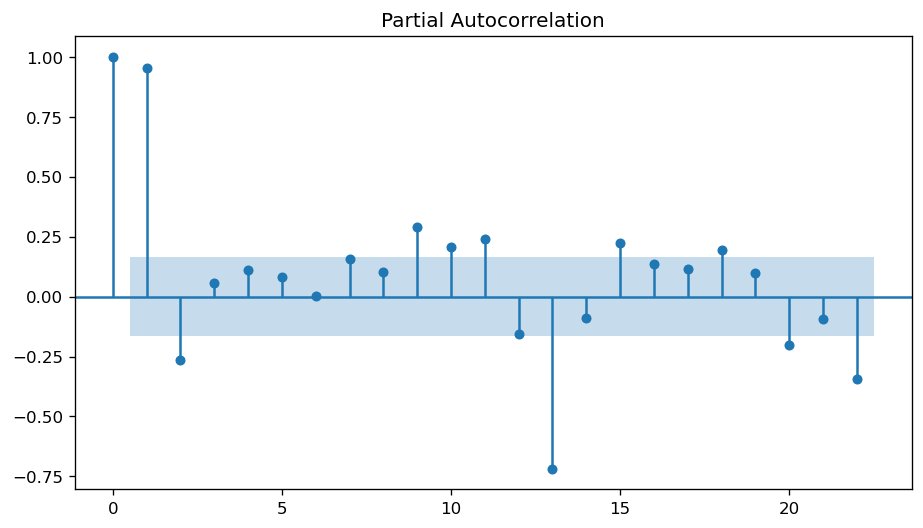

In [32]:
plot_pacf(airline_passenger['Passengers'])
plt.show()

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


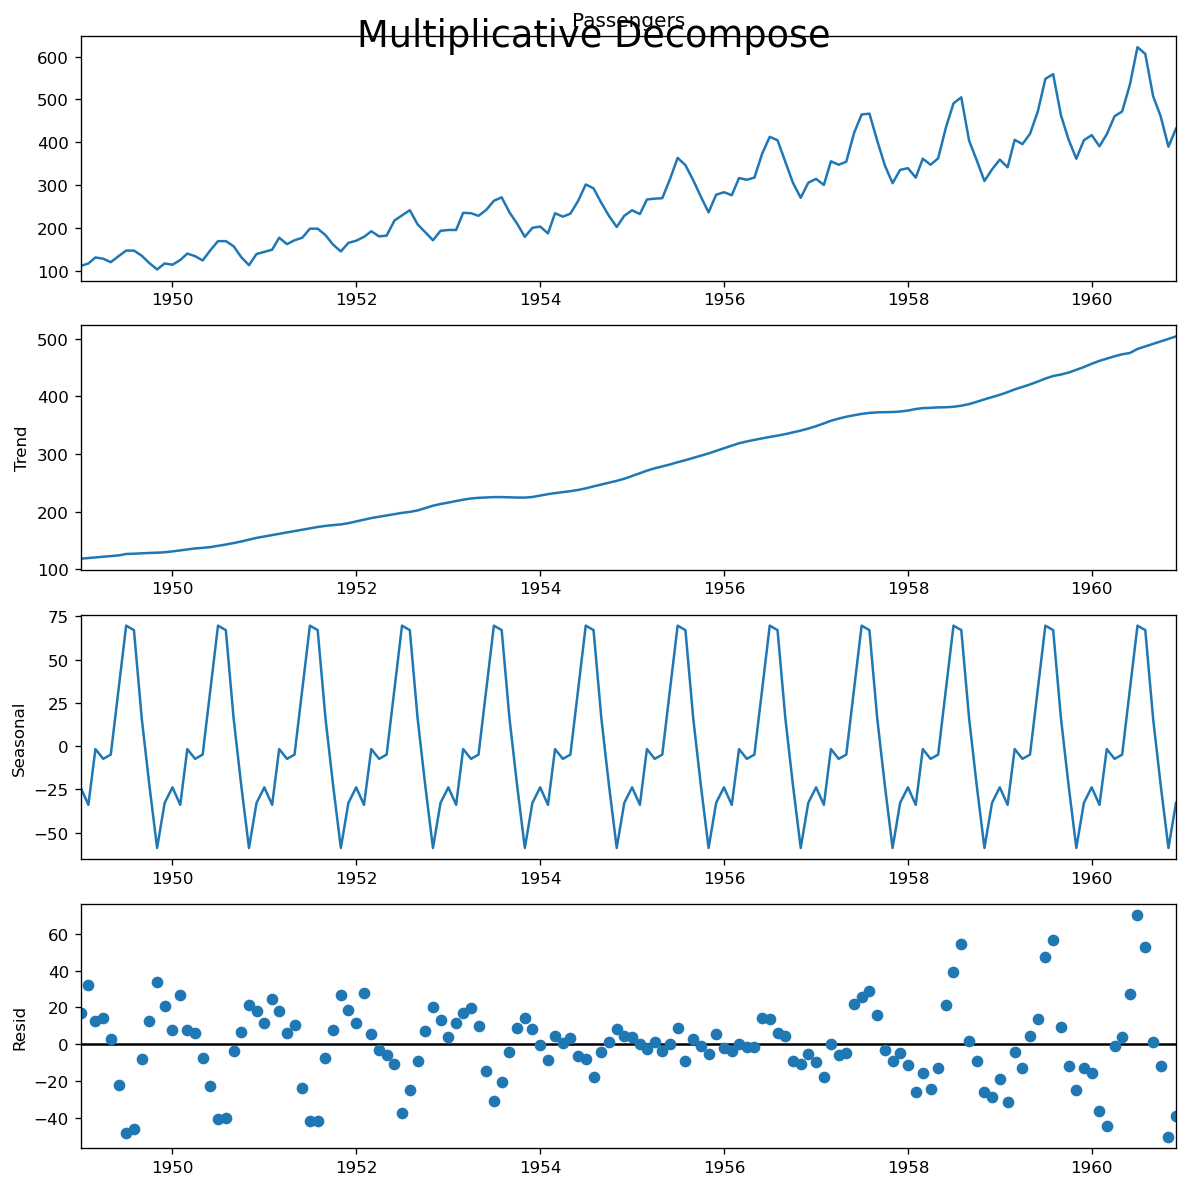

In [34]:
decompose = seasonal_decompose(airline_passenger['Passengers'],  extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (10,10)})
decompose.plot().suptitle('Multiplicative Decompose', fontsize=22)

plt.show()



Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [39]:
stationary_data = airline_passenger['Passengers'].apply(np.log)

stationary_data=pd.DataFrame(stationary_data)
stationary_data


,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [47]:
res = adfuller(stationary_data["Passengers"])

print(': %.2f' % res[0])
print('5%% Critical Value: %.2f' % res[4]['5%'])
print('p-value: %.2f' % res[1])

: -1.72
5% Critical Value: -2.88
p-value: 0.42


MA(1)

In [48]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(stationary_data, order=(0,1))
result = model.fit()

print(result.summary())


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(0, 1)   Log Likelihood                  -0.438
Method:                       css-mle   S.D. of innovations              0.241
Date:                Wed, 19 Jan 2022   AIC                              6.876
Time:                        23:55:19   BIC                             15.786
Sample:                    01-01-1949   HQIC                            10.497
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5416      0.039    142.454      0.000       5.465       5.618
ma.L1.Passengers     0.9448      0.023     41.418      0.000       0.900       0.990
                            

Display the output

In [49]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(stationary_data, order=(0,2))

answer = model.fit()


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

MA(2)

Display the output

AR(2)

In [50]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(stationary_data, order=(2,0))

answer2 = model.fit()

print(answer2.summary())


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(2, 0)   Log Likelihood                 120.641
Method:                       css-mle   S.D. of innovations              0.104
Date:                Thu, 20 Jan 2022   AIC                           -233.283
Time:                        00:03:40   BIC                           -221.403
Sample:                    01-01-1949   HQIC                          -228.456
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5050      0.255     21.565      0.000       5.005       6.005
ar.L1.Passengers     1.1933      0.081     14.698      0.000       1.034       1.352
ar.L2.Passengers    -0.2224 

ARMA (?,?)

In [51]:
model = ARMA(stationary_data, order=(2,1))
answer3 = model.fit()

print(answer3.summary())


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(2, 1)   Log Likelihood                 124.337
Method:                       css-mle   S.D. of innovations              0.101
Date:                Thu, 20 Jan 2022   AIC                           -238.673
Time:                        00:05:31   BIC                           -223.824
Sample:                    01-01-1949   HQIC                          -232.639
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4998      0.291     18.922      0.000       4.930       6.069
ar.L1.Passengers     0.4090      0.133      3.084      0.002       0.149       0.669
ar.L2.Passengers     0.5472 

Display the output

ARIMA(?,?)

In [52]:
model = ARMA(stationary_data, order=(2,1,1))
answer4 = model.fit()

print(answer4.summary())

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(2, 1)   Log Likelihood                 124.337
Method:                       css-mle   S.D. of innovations              0.101
Date:                Thu, 20 Jan 2022   AIC                           -238.673
Time:                        00:07:00   BIC                           -223.824
Sample:                    01-01-1949   HQIC                          -232.639
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4998      0.291     18.922      0.000       4.930       6.069
ar.L1.Passengers     0.4090      0.133      3.084      0.002       0.149       0.669
ar.L2.Passengers     0.5472 

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [55]:
from statsmodels.tools.eval_measures import rmse

rmse_MA1 = rmse(model,res)
rmse_MA1


TypeError: unsupported operand type(s) for -: 'ARMA' and 'float'

Calculate AIC